In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

In [4]:
df = pd.read_csv(r"/content/Mall_Customers.csv")

# Univariant Analysis

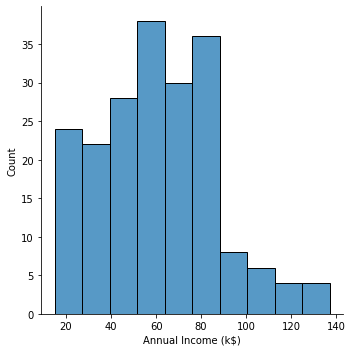

In [5]:
sb.displot(df['Annual Income (k$)'])

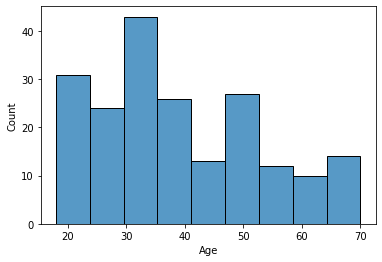

In [6]:
sb.histplot(df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


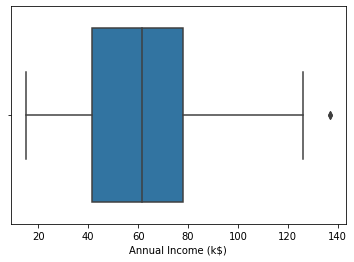

In [7]:
sb.boxplot(df['Annual Income (k$)'])

# Bivariate Analaysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


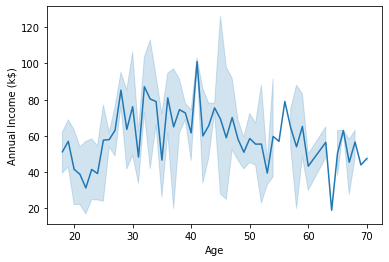

In [8]:
sb.lineplot(df['Age'], df['Annual Income (k$)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


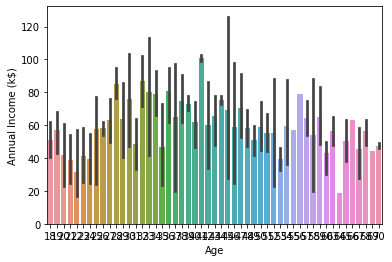

In [9]:
sb.barplot(df['Age'], df['Annual Income (k$)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


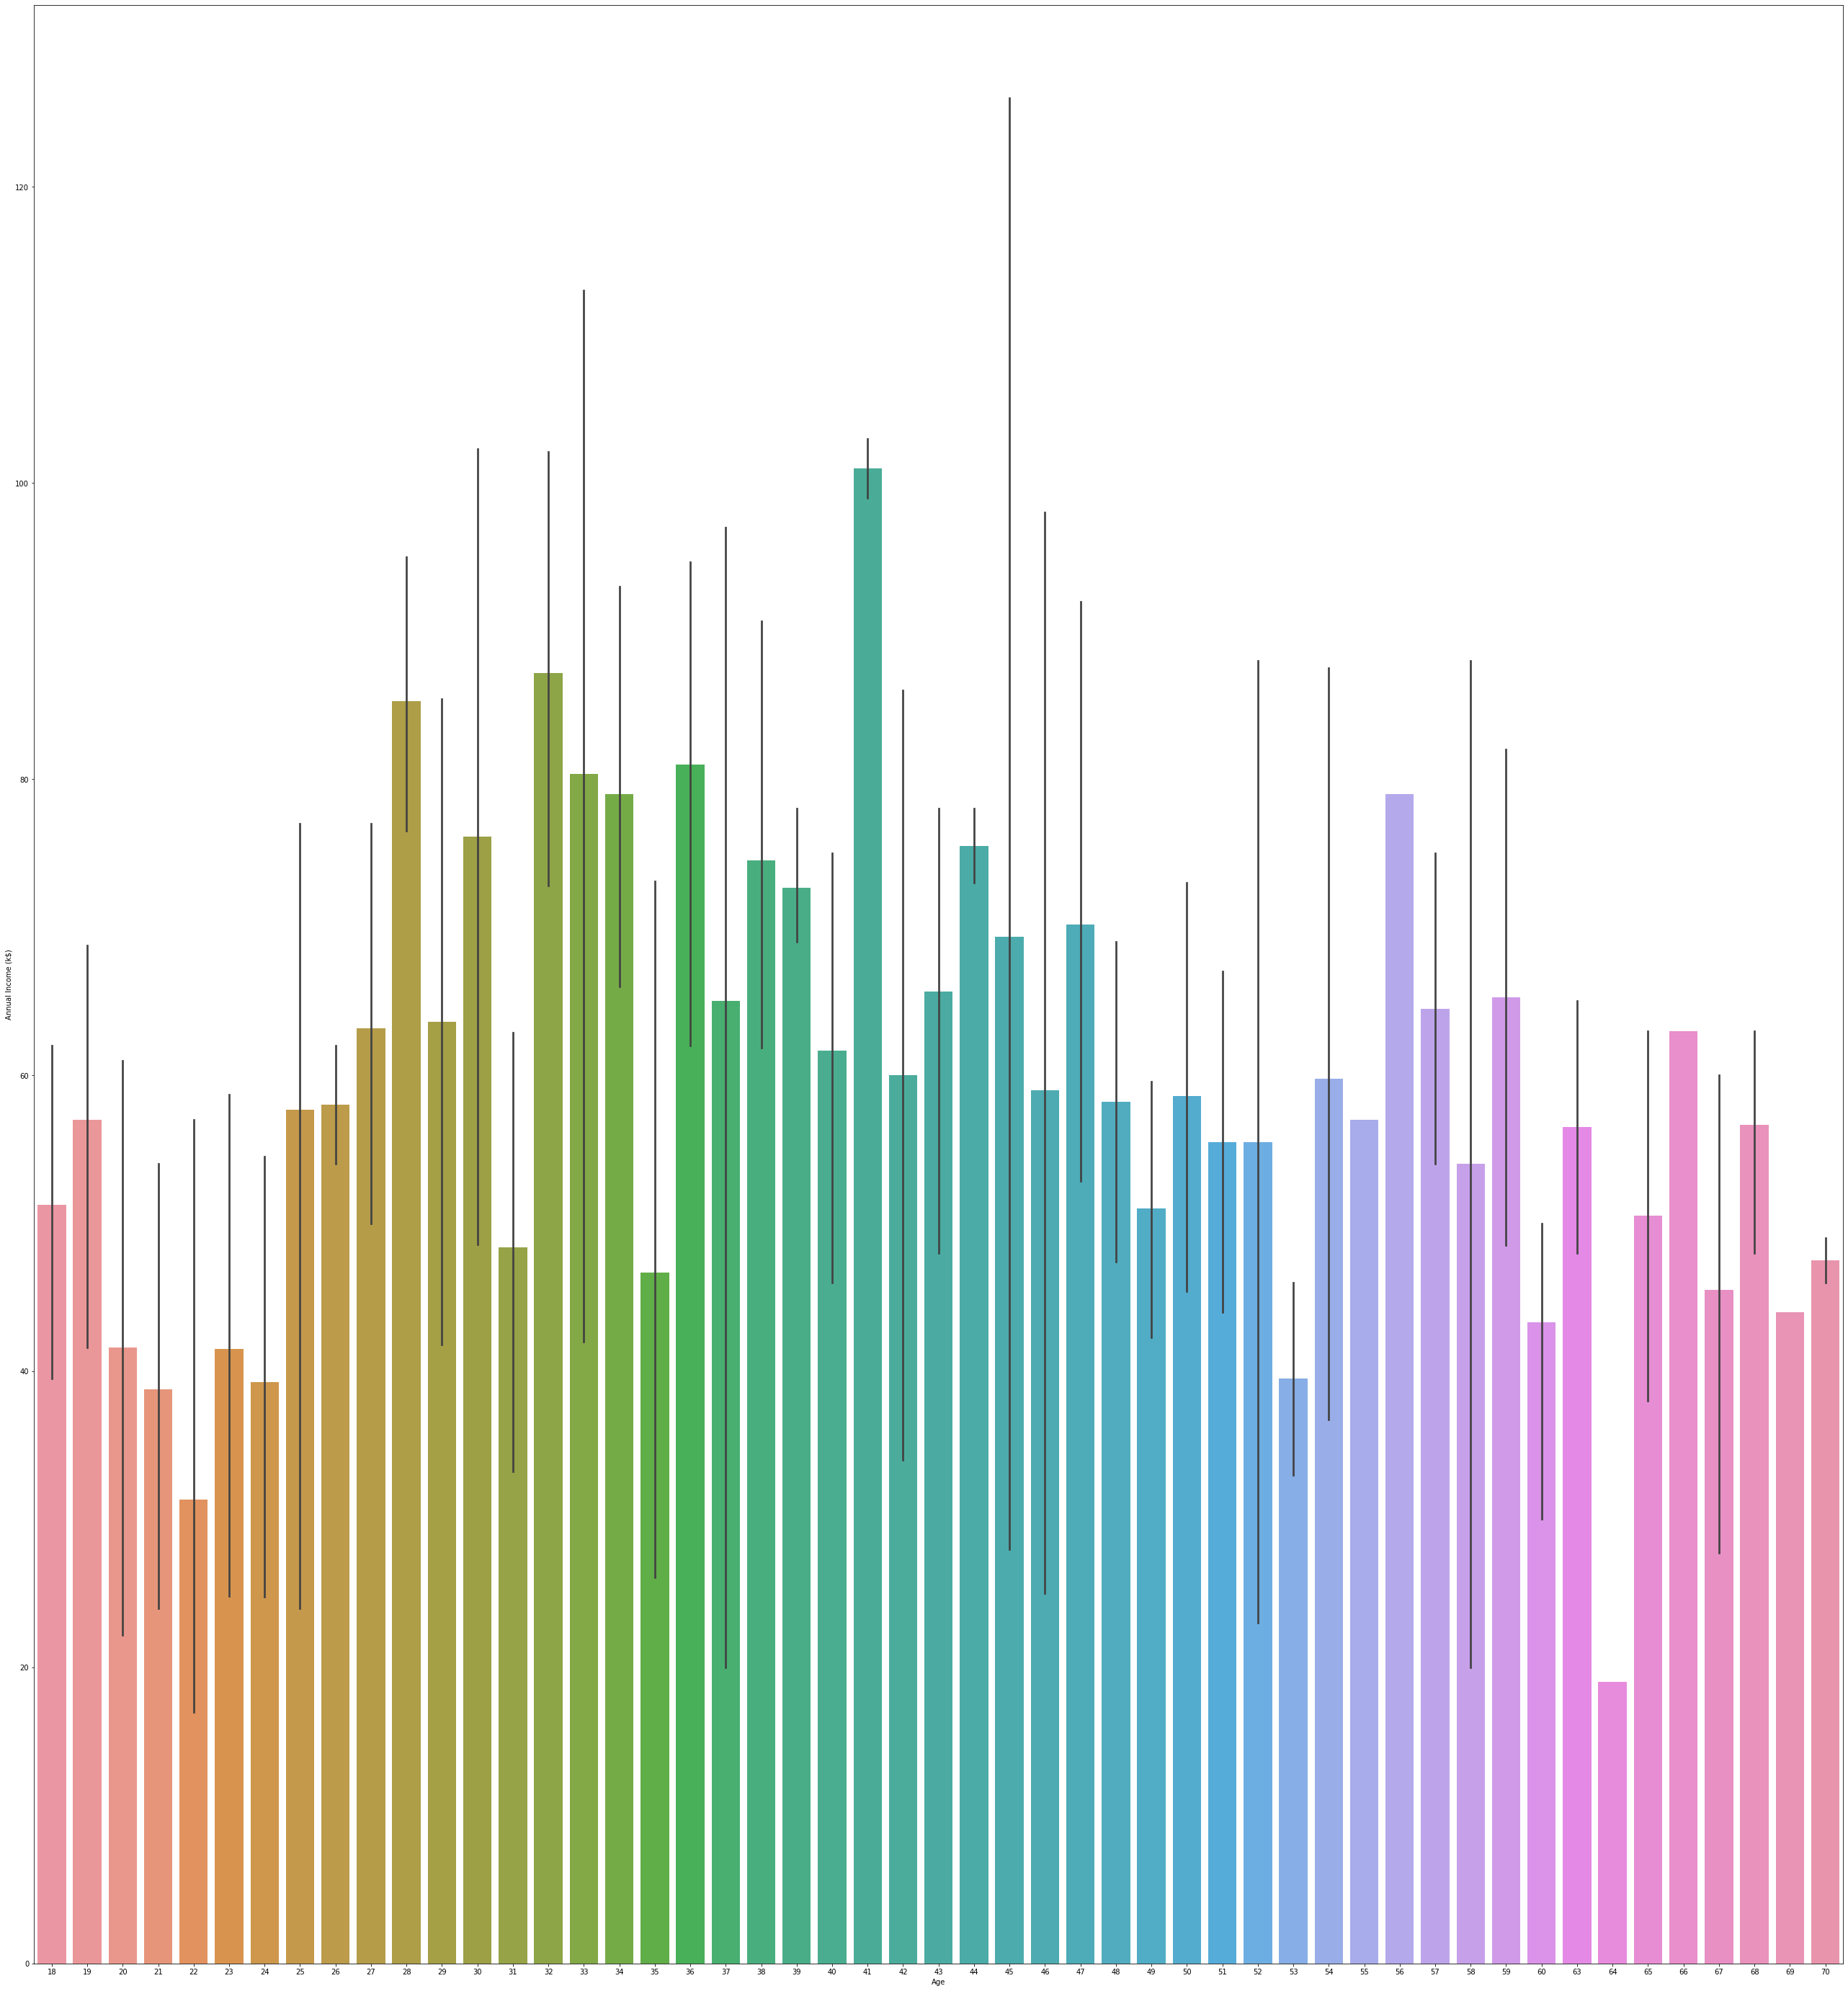

In [10]:
plt.figure(figsize=(45,50))
sb.barplot(df['Age'], df['Annual Income (k$)'])

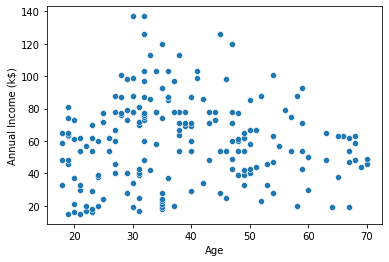

In [11]:
sb.scatterplot(data = df, x = 'Age', y = 'Annual Income (k$)')

# Multivariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


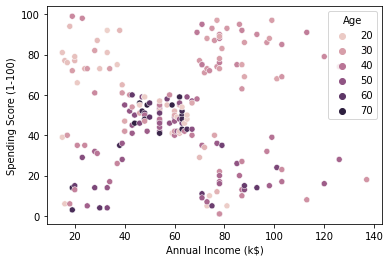

In [12]:
sb.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], hue = df["Age"])

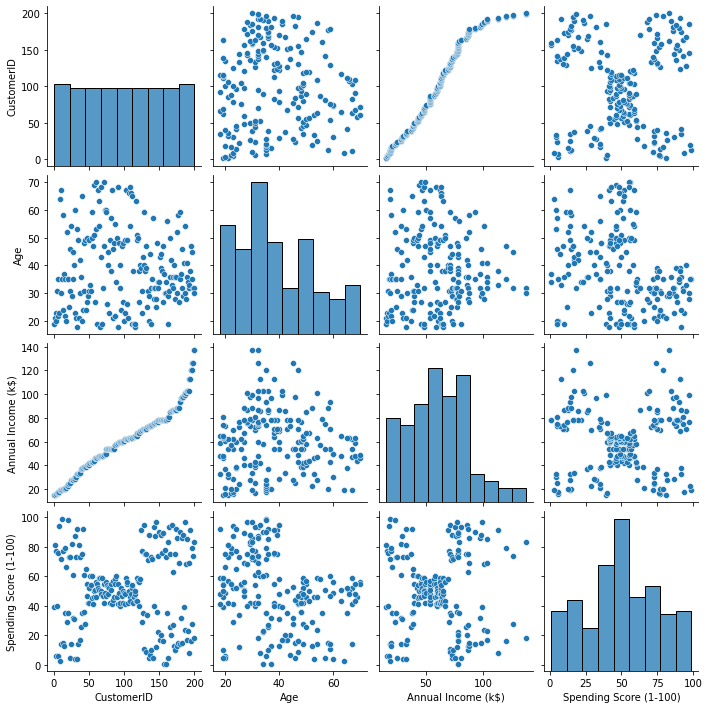

In [13]:
sb.pairplot(df)

# Descriptive Statistics

In [14]:
df.mean(numeric_only = True)

CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [15]:
df.median(numeric_only = True)

CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [16]:
df['Age'].mode()

0    32
dtype: int64

In [17]:
df['Annual Income (k$)'].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137])

In [18]:
df.std(numeric_only=True)

CustomerID                57.879185
Age                       13.969007
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64

In [19]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [20]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [21]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


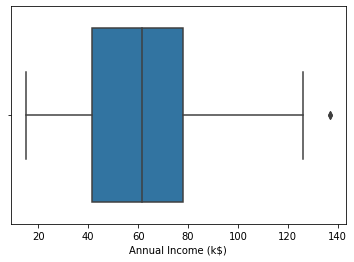

In [22]:
sb.boxplot(df['Annual Income (k$)'])

In [23]:
q = df.quantile([0.75,0.25])

In [24]:
q

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.75,150.25,49.00,78.0,73.00
0.25,50.75,28.75,41.5,34.75


In [25]:
iqr =  q.iloc[0] - q.iloc[1] 

In [26]:
iqr

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64

In [27]:
u = q.iloc[0] + (1.5*iqr)  

In [28]:
u

CustomerID                299.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64

In [29]:
l = q.iloc[1] - (1.5*iqr) 

In [30]:
l

CustomerID               -98.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

In [31]:
df['Annual Income (k$)'] = np.where(np.logical_or(df['Annual Income (k$)']>132.75,df['Annual Income (k$)']<-13.250), 61.5,df['Annual Income (k$)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


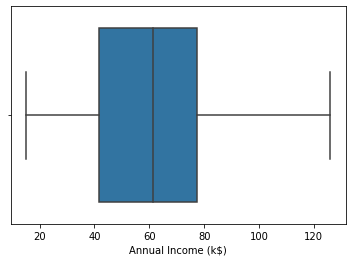

In [32]:
sb.boxplot(df['Annual Income (k$)'])

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender']) 

In [34]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40


# Scaling

In [35]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
x_scaled = min_max.fit_transform(df)

In [36]:
x_scaled

array([[0.        , 1.        , 0.01923077, 0.        , 0.3877551 ],
       [0.00502513, 1.        , 0.05769231, 0.        , 0.81632653],
       [0.01005025, 0.        , 0.03846154, 0.00900901, 0.05102041],
       [0.01507538, 0.        , 0.09615385, 0.00900901, 0.7755102 ],
       [0.0201005 , 0.        , 0.25      , 0.01801802, 0.39795918],
       [0.02512563, 0.        , 0.07692308, 0.01801802, 0.76530612],
       [0.03015075, 0.        , 0.32692308, 0.02702703, 0.05102041],
       [0.03517588, 0.        , 0.09615385, 0.02702703, 0.94897959],
       [0.04020101, 1.        , 0.88461538, 0.03603604, 0.02040816],
       [0.04522613, 0.        , 0.23076923, 0.03603604, 0.7244898 ],
       [0.05025126, 1.        , 0.94230769, 0.03603604, 0.13265306],
       [0.05527638, 0.        , 0.32692308, 0.03603604, 1.        ],
       [0.06030151, 0.        , 0.76923077, 0.04504505, 0.14285714],
       [0.06532663, 0.        , 0.11538462, 0.04504505, 0.7755102 ],
       [0.07035176, 1.        , 0.

In [37]:
from sklearn.cluster import KMeans
KM=KMeans()
cluster = KM.fit_predict(x_scaled)

In [38]:
cluster

array([1, 1, 5, 5, 5, 5, 0, 5, 6, 5, 6, 5, 0, 5, 1, 1, 5, 1, 6, 5, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 5, 6, 5, 6, 1, 0, 5, 0, 5, 0, 5, 0, 1, 6, 5,
       0, 5, 0, 5, 5, 5, 0, 1, 5, 6, 0, 6, 0, 6, 5, 6, 6, 1, 0, 0, 6, 1,
       0, 0, 1, 5, 6, 0, 0, 0, 6, 1, 0, 1, 5, 0, 6, 1, 6, 0, 5, 6, 0, 5,
       5, 0, 0, 1, 6, 0, 5, 1, 0, 5, 6, 1, 5, 0, 6, 1, 6, 5, 0, 6, 6, 6,
       6, 5, 3, 1, 5, 5, 0, 0, 0, 0, 7, 3, 2, 7, 3, 2, 4, 7, 4, 7, 4, 7,
       3, 2, 4, 2, 3, 7, 4, 2, 3, 7, 3, 2, 4, 7, 4, 2, 3, 7, 4, 7, 3, 2,
       3, 2, 4, 2, 4, 2, 3, 2, 4, 2, 4, 2, 4, 2, 3, 7, 4, 7, 4, 7, 3, 2,
       4, 7, 4, 7, 3, 2, 4, 2, 3, 7, 3, 7, 3, 2, 3, 2, 4, 2, 3, 2, 3, 7,
       4, 7], dtype=int32)

In [39]:
value = df.columns

In [40]:
value

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [41]:
data1 = pd.DataFrame(x_scaled, columns = value)

In [42]:
data1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.000000,0.387755
1,0.005025,1.0,0.057692,0.000000,0.816327
2,0.010050,0.0,0.038462,0.009009,0.051020
3,0.015075,0.0,0.096154,0.009009,0.775510
4,0.020101,0.0,0.250000,0.018018,0.397959
...,...,...,...,...,...
195,0.979899,0.0,0.326923,0.945946,0.795918
196,0.984925,0.0,0.519231,1.000000,0.275510
197,0.989950,1.0,0.269231,1.000000,0.744898
198,0.994975,1.0,0.269231,0.418919,0.173469


In [43]:
data1['Cluster_value'] = pd.Series(cluster)

In [44]:
data1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_value
0,0.000000,1.0,0.019231,0.000000,0.387755,1
1,0.005025,1.0,0.057692,0.000000,0.816327,1
2,0.010050,0.0,0.038462,0.009009,0.051020,5
3,0.015075,0.0,0.096154,0.009009,0.775510,5
4,0.020101,0.0,0.250000,0.018018,0.397959,5


# Split the data in X and Y

In [45]:
y = data1['Cluster_value']
data1 = data1.drop(['CustomerID','Cluster_value'], axis = 1)
x = data1
x

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.009009,0.051020
3,0.0,0.096154,0.009009,0.775510
4,0.0,0.250000,0.018018,0.397959
...,...,...,...,...
195,0.0,0.326923,0.945946,0.795918
196,0.0,0.519231,1.000000,0.275510
197,1.0,0.269231,1.000000,0.744898
198,1.0,0.269231,0.418919,0.173469


In [46]:
y

0      1
1      1
2      5
3      5
4      5
      ..
195    2
196    3
197    7
198    4
199    7
Name: Cluster_value, Length: 200, dtype: int32

# Split x and y into Training and Testing

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 0)

In [48]:
x_train

array([[0.65829146, 1.        , 0.40384615, 0.5045045 , 0.75510204],
       [0.48241206, 0.        , 0.55769231, 0.40540541, 0.46938776],
       [0.90954774, 0.        , 0.26923077, 0.73873874, 0.86734694],
       [0.09547739, 0.        , 0.32692308, 0.07207207, 0.98979592],
       [0.76884422, 0.        , 0.38461538, 0.56756757, 0.76530612],
       [0.46231156, 1.        , 0.57692308, 0.40540541, 0.48979592],
       [0.27135678, 0.        , 0.61538462, 0.25225225, 0.44897959],
       [0.81909548, 0.        , 0.25      , 0.59459459, 0.93877551],
       [0.25628141, 1.        , 0.28846154, 0.24324324, 0.60204082],
       [0.4321608 , 0.        , 0.71153846, 0.37837838, 0.58163265],
       [0.69849246, 0.        , 0.32692308, 0.53153153, 0.7244898 ],
       [0.45226131, 0.        , 0.96153846, 0.3963964 , 0.55102041],
       [0.68844221, 1.        , 0.26923077, 0.52252252, 0.73469388],
       [0.50753769, 0.        , 0.59615385, 0.42342342, 0.47959184],
       [0.72361809, 1.        , 0.

In [49]:
x_train.shape

(140, 5)

In [50]:
x_test

array([[0.09045226, 1.        , 0.65384615, 0.07207207, 0.28571429],
       [0.85427136, 1.        , 0.42307692, 0.64864865, 0.12244898],
       [0.53768844, 1.        , 0.69230769, 0.43243243, 0.45918367],
       [0.49246231, 1.        , 0.57692308, 0.41441441, 0.41836735],
       [0.88944724, 1.        , 0.17307692, 0.65765766, 0.69387755],
       [0.91457286, 1.        , 0.53846154, 0.74774775, 0.14285714],
       [0.02512563, 0.        , 0.07692308, 0.01801802, 0.76530612],
       [0.73366834, 1.        , 0.57692308, 0.55855856, 0.35714286],
       [0.06030151, 0.        , 0.76923077, 0.04504505, 0.14285714],
       [0.7638191 , 0.        , 0.5       , 0.56756757, 0.19387755],
       [0.30653266, 1.        , 0.01923077, 0.27927928, 0.55102041],
       [0.6281407 , 0.        , 0.25      , 0.4954955 , 0.7755102 ],
       [0.90452261, 0.        , 0.36538462, 0.73873874, 0.31632653],
       [0.77386935, 0.        , 0.55769231, 0.56756757, 0.15306122],
       [0.40201005, 1.        , 0.

In [51]:
x_test.shape

(60, 5)

In [52]:
y_train

131    7
96     0
181    2
19     5
153    2
      ..
67     0
192    4
117    0
47     5
172    4
Name: Cluster_value, Length: 140, dtype: int32

In [53]:
y_test

18     6
170    4
107    6
98     6
177    7
182    4
5      5
146    4
12     0
152    3
61     1
125    2
180    3
154    3
80     6
7      5
33     1
130    4
37     5
74     6
183    2
145    7
45     5
159    2
60     6
123    7
179    7
185    7
122    2
44     0
16     5
55     6
150    4
111    5
22     0
189    2
129    7
4      5
83     0
106    0
134    4
66     0
26     0
113    1
168    3
63     0
8      6
75     1
118    0
143    2
71     0
124    3
184    3
97     5
149    7
24     0
30     6
160    3
40     0
56     0
Name: Cluster_value, dtype: int32

# Multi inear regression model

In [54]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [55]:
pred = mlr.predict(x_test)

In [57]:
pred

array([3.2966469 , 4.27715757, 4.04779783, 3.97005105, 4.95274248,
       4.29862717, 2.26212323, 4.27925103, 1.5107883 , 2.62680792,
       4.00800343, 3.03490329, 2.92465131, 2.59074786, 3.87107718,
       2.4401162 , 4.18013791, 3.91126234, 2.38146766, 3.76000811,
       3.52925076, 4.97145834, 2.38536044, 3.28744334, 3.69692452,
       4.68450892, 5.08660943, 5.19939308, 2.77638083, 1.87087277,
       1.87419003, 3.66603197, 4.16187836, 2.7997394 , 1.55244397,
       3.4813224 , 4.58409751, 1.85455267, 2.32401359, 2.42487226,
       4.06306593, 2.27215533, 1.83351368, 4.31416389, 2.83667367,
       2.2679608 , 2.90482781, 4.03765663, 2.5411352 , 3.26136082,
       2.21483023, 2.61660384, 2.99244158, 2.5936    , 4.90133924,
       1.58712931, 3.07902449, 2.77010744, 1.80706803, 2.15215294])

In [56]:
y_test

18     6
170    4
107    6
98     6
177    7
182    4
5      5
146    4
12     0
152    3
61     1
125    2
180    3
154    3
80     6
7      5
33     1
130    4
37     5
74     6
183    2
145    7
45     5
159    2
60     6
123    7
179    7
185    7
122    2
44     0
16     5
55     6
150    4
111    5
22     0
189    2
129    7
4      5
83     0
106    0
134    4
66     0
26     0
113    1
168    3
63     0
8      6
75     1
118    0
143    2
71     0
124    3
184    3
97     5
149    7
24     0
30     6
160    3
40     0
56     0
Name: Cluster_value, dtype: int32

# Performance metrics

In [58]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [59]:
mean= mean_squared_error(y_test,pred)
mean

4.117893503553905

In [60]:
rmse = np.sqrt(mean)
rmse

2.0292593485195294

In [61]:
r2_score(y_test,pred)

0.31444614258259074